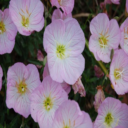

In [13]:
import torchvision
import torch
from PIL import Image
import ssl


# Bypass SSL certificate verification
ssl._create_default_https_context = ssl._create_unverified_context

## Create a vector of zeros of size 5
size = (128, 128) # all image of the same size
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size), torchvision.transforms.ToTensor()])
train_dataset = torchvision.datasets.Flowers102("./flowers", "train", transform=transform, download=True)
test_dataset = torchvision.datasets.Flowers102("./flowers", "test", transform=transform, download=True)

'''
Converts data from the data set into the image to view.
'''
def visualize_image(img: torch.Tensor) -> Image.Image:
  return Image.fromarray((img.permute(1, 2, 0) * 255).to(torch.uint8).numpy())

visualize_image(train_dataset[0][0])

In [14]:
train_dataset[0]
# each image is a tensor of all the pixels and the label is the class of the image

(tensor([[[0.0471, 0.0706, 0.0745,  ..., 0.1255, 0.4667, 0.5647],
          [0.0667, 0.0667, 0.0549,  ..., 0.1333, 0.4824, 0.5647],
          [0.0824, 0.0745, 0.0549,  ..., 0.1451, 0.5059, 0.5686],
          ...,
          [0.1059, 0.1059, 0.0863,  ..., 0.5020, 0.4902, 0.4706],
          [0.1137, 0.1137, 0.1294,  ..., 0.5059, 0.4784, 0.4706],
          [0.1020, 0.1176, 0.1176,  ..., 0.5020, 0.4745, 0.4667]],
 
         [[0.0863, 0.1255, 0.1373,  ..., 0.1294, 0.3412, 0.3961],
          [0.0941, 0.1098, 0.1059,  ..., 0.1294, 0.3490, 0.3922],
          [0.0941, 0.0941, 0.0824,  ..., 0.1294, 0.3608, 0.3843],
          ...,
          [0.2000, 0.1804, 0.1333,  ..., 0.4235, 0.4118, 0.3922],
          [0.2118, 0.2039, 0.2000,  ..., 0.4275, 0.4039, 0.3922],
          [0.2078, 0.2196, 0.2196,  ..., 0.4196, 0.4078, 0.3765]],
 
         [[0.0314, 0.0392, 0.0353,  ..., 0.0863, 0.4745, 0.5961],
          [0.0392, 0.0353, 0.0235,  ..., 0.0980, 0.4902, 0.5922],
          [0.0431, 0.0353, 0.0235,  ...,

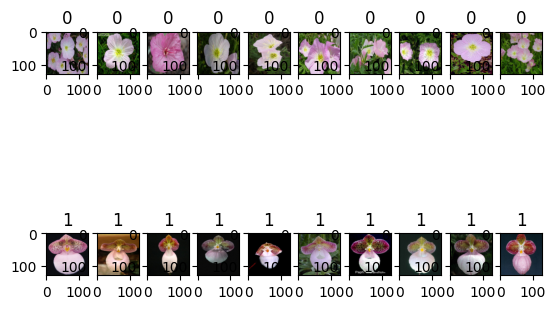

In [29]:
import matplotlib.pyplot as plt

# View the first 20 images
f, ax = plt.subplots(2, 10)
for i, (im, l) in enumerate(list(train_dataset)[:20]):
  ax[i // 10, i % 10].imshow(visualize_image(im))
  ax[i // 10, i % 10].set_title(l)


Train a classifier to distinguish class number 1 (the first 10 images) from class number 2 (the second 10 images)

In [30]:
class_0 = list(train_dataset)[:10]
class_1 = list(train_dataset)[10:20]

## Nearest Neighbor Classifier

$f: \mathbb{R} \to \{0, 1\}$

- Input $x$
- Find *closest* data point $(\tilde x, lbl) \in \mathcal{D}$ in dataset $\mathcal{D}$
- Return its label $lbl$

Given an image x, it will go through the two classes and find the image in the dataset that is closes.

In [37]:
# Good to combine the data sets when looking for the nearest neighbor.
class_01 = list(train_dataset)[:20]

def nn_classifier(x):
  # Hold the distance to the image and the label
  distance = [((x - im).pow(2).sum(), l) for im, l in class_01]

  # Find the minimum distance and return the label
  return min(distance)[1]
  # find element with smallest distance

nn_classifier(test_dataset[0][0])

# Get the accuracy of the model by seeing how often the model is correct
# 20 images by checking if the labels match
accuracy = sum(nn_classifier(im) == l for im, l in list(test_dataset)[:20]) / 20 

In [38]:
print(accuracy)

0.4


## K Nearest Neighbor Classifier

$f: \mathbb{R} \to \{0, 1\}$

- Input $x$
- Find k *closest* data points in dataset $\mathcal{D}$
- Return most common label

## K Nearest Neighbor Regression

$f: \mathbb{R} \to \mathbb{R}$

- Input $x$
- Find k *closest* data points in dataset $\mathcal{D}$
- Return average value